<h1 align="center">Solution of Assignment_6 </h1>
<h1 align="center">Instructor: Gopal Hazra </h1>
<h1 align="center"> Computational Physics-PHY617, Dept of Physics, IIT Kanpur <h1>

<font size="5">Question 1</font>

| **x** | 1.00 | 2.00 | 3.00 | 4.00 | 5.00 |
|-------|------|------|------|------|------|
| **y** | 13.00 | 15.00 | 12.00 | 9.00 | 13.00 |

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex']=True #### For latex type labelling in plots

In [85]:
x_data = np.array([1.00,   2.00, 3.00,  4.00, 5.00])
y_data = np.array([13.00, 15.00, 12.00, 9.00, 13.00])

<font size="3">Part (1a)</font>

$$ x_0 = a < x_1 < x_2 < x_3 < ... < x_n = b $$

Using the continuity of first order derivative $(y')$ at the boundary of each interval $[x_j,x_{j+1}]$ implies :

$$
\begin{equation}
 h_j y_{j+1}^" + 2(h_{j-1} + h_{j})y_{j}^" + h_{j-1} y_{j-1}^" = \frac{6}{h_j}(y_{j+1} - y_{j}) - \frac{6}{h_{j-1}}(y_j - y_{j-1})
\end{equation}\tag{1}
$$

$$ \text{where} \;\; j = 1,2,3,...,n-1, \;\; \text{and} \;\; h_j = x_{j+1} - x_j $$

and using natural boundary conditions at $x_0 = a$ and $x_n = b$ imply :

$$
\begin{equation}
y_{0}^" = 0, \;\; y_{n}^" = 0
\end{equation}\tag{2}
$$

If all intervals $[x_j,x_{j+1}]$ are equal i.e., $h_j = x_{j+1} - x_j = h$, then above equations become :

$$
\begin{equation}
y_{j+1}^" + 4 y_j^" + y_{j-1}^" = \frac{6}{h^2}(y_{j+1} - 2y_j + y_{j-1}), \;\; j = 1,2,3,...,n-1
\end{equation}\tag{3}
$$

$$
\begin{equation}
\text{and} \;\; y_0^" = 0, \;\; y_n^" = 0 \text{}
\end{equation}\tag{4}
$$

For the given data which has equal intervals, $h=1$ :

$$
\begin{align}
y_{2}^" + 4 y_{1}^" + y_{0}^" &= 6(y_2 - 2 y_1 + y_0) \\
y_{3}^" + 4 y_{2}^" + y_{1}^" &= 6(y_3 - 2 y_2 + y_1) \\
y_{4}^" + 4 y_{3}^" + y_{2}^" &= 6(y_4 - 2 y_3 + y_2) \\
y_0^" &= 0 \\
y_4^"  &= 0
\end{align}\tag{5}
$$

Which results in :

$$
\begin{align}
4 y_{1}^" + y_{2}^" + 0.y_{3}^" &= - 30 \\
y_{1}^"   + 4 y_{2}^" + y_{3}^" &= 0 \\
0.y_{1}^" + y_{2}^" + 4 y_{3}^"&= 42 \\
y_0^" &= 0 \\
y_4^"  &= 0
\end{align}\tag{6}
$$

After solving equation(6), we get:

$$
\begin{align}
y_0^" &= 0 \\
y_1^" &= \frac{-51}{7} \\
y_2^" &= \frac{-6}{7} \\
y_3^" &= \frac{75}{7} \\
y_4^" &= 0
\end{align}\tag{7}
$$

In [86]:
#### Second derivative at all points are
ydd = np.array([0.0, -51.0/7, -6.0/7, 75.0/7, 0])
print(f"{ydd}")

[ 0.         -7.28571429 -0.85714286 10.71428571  0.        ]


<font size="3">Part 1b</font>

Natural cubic interpolant in an interval $x \in [x_{j},x_{j+1}]$ is given by :

$$
\begin{equation}
S_j(x) = A y_j + B y_{j+1} + C y_j^" + D y_{j+1}^"
\end{equation}\tag{8}
$$

where

$$
\begin{align}
A &= \frac{x_{j+1} - x}{x_{j+1} - x_j} \\
B &= \frac{x - x_j}{x_{j+1} - x_j} \\
C &= \frac{1}{6} (A^3 - A) (x_{j+1} - x_j)^2 \\
D &= \frac{1}{6} (B^3 - B) (x_{j+1} - x_j)^2
\end{align}
$$

In [87]:
x_interp = 3.4

def cubic_spline(xp,xdata,ydata,dy):
    n = len(xdata)
    for i in range(n):
        if xdata[i] < xp < xdata[i+1]:
            A = (xdata[i+1] - xp)/(xdata[i+1] - xdata[i])
            B = (xp - xdata[i])/(xdata[i+1]- xdata[i])
            C = (1.0/6.0)*(A**3-A)*(xdata[i+1]- xdata[i])**2
            D = (1.0/6.0)*(B**3 - B)*(xdata[i+1]- xdata[i])**2
            y1 = A*ydata[i] + B*ydata[i+1] + C*dy[i] + D*dy[i+1]
            return y1

print(f'Interpolated value = {cubic_spline(x_interp,x_data,y_data,ydd):0.6f} at x = {x_interp}')

Interpolated value = 10.254857 at x = 3.4


<font size="5">Question 2</font>

<font size="3">
$$
\begin{equation}
I = \int_{0}^{\infty} \frac{x^3}{e^x -1} dx = \frac{\pi^4}{15}
\end{equation}\tag{9}
$$
</font>

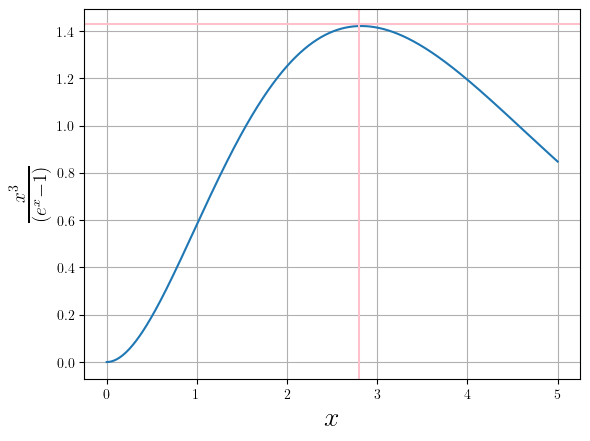

In [92]:
def fun1(x):
    return x**3/(np.exp(x)-1)

x_small = 0.00001
x = np.linspace(x_small,5,100000)

plt.plot(x,fun1(x))
plt.xlabel(r"$x$",fontsize=20)
plt.ylabel(r"$\frac{x^3}{(e^x-1)}$",fontsize=20)
plt.grid()
plt.axvline(x=2.8,color='pink')
plt.axhline(y=1.43,color='pink')
plt.show()

<font size="3">
Doing substitution $z = \frac{x}{c+x}$ in the integration of $I$ implies :

$$ x = \frac{cz}{1-z}$$

$$ \implies dx = \frac{cz}{1-z} dz$$

$$ \implies I = \int_{0}^{\infty} \frac{x^3}{e^x -1} dx = \int_{0}^{1} \frac{c^4 z^3}{(1-z)^5(e^{\frac{cz}{1-z}} -1)} dz $$
    
$$ \text{where} \;\; c \approx 1.43 \;\; \text{is the maximum value of integrand in equation (9) in the region} \;\; 0<x<\infty \;\;$$

In [100]:
##### Modified integrand fun2(x) after substituting x = cz/(1-z) in fun1(x)
c = 1.43 #### Integrand's maximum value is around 1.43
def fun2(x):
    return (c**4*x**3)/( (1-x)**5*(np.exp(c*x/(1-x)) - 1) )

##### Integration by trapezoidal rule
def trapezoid(f,a,b,N):
    s = 0.5*(f(a) + f(b))
    h =  (b-a)/N
    for i in range(1,N):
        s = s + f(a+i*h)
        
    return s*h

x_start = 1e-4 #### Lower limit taken is slightly greater than 0 since 1/z blows at z=0
x_end = 1-1e-4 #### Upper limit taken is slightly less than 1 since 1/(1-z) blows at z=1
N = 20
integral = trapezoid(fun2,x_start,x_end,N)
print(f"Integral value using trapezoidal rule = {integral:0.5f}")
print(f"Integral value from analytical calculation = {np.pi**4/15:0.5f}")
error = abs(integral - np.pi**4/15)
print(f"error = {error:0.5e}, and %error = {(error*100/np.pi**4/15):0.5e}")

Integral value using trapezoidal rule = 6.49328
Integral value from analytical calculation = 6.49394
error = 6.58682e-04, and %error = 4.50801e-05


/tmp/ipykernel_25539/3389491032.py:4: RuntimeWarning: overflow encountered in exp
  return (c**4*x**3)/( (1-x)**5*(np.exp(c*x/(1-x)) - 1) )


<font size="5">Question 3</font>

<font size="3">
$$
\begin{equation}
E(x) = \int_{0}^{x} e^{-t^2} dt
\end{equation}
$$
</font>

30
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ] 

x = 0.00, E(x) = 0.000000
x = 0.10, E(x) = 0.099668
x = 0.20, E(x) = 0.197365
x = 0.30, E(x) = 0.291237
x = 0.40, E(x) = 0.379652
x = 0.50, E(x) = 0.461279
x = 0.60, E(x) = 0.535151
x = 0.70, E(x) = 0.600682
x = 0.80, E(x) = 0.657665
x = 0.90, E(x) = 0.706236
x = 1.00, E(x) = 0.746818
x = 1.10, E(x) = 0.780055
x = 1.20, E(x) = 0.806738
x = 1.30, E(x) = 0.827736
x = 1.40, E(x) = 0.843934
x = 1.50, E(x) = 0.856182
x = 1.60, E(x) = 0.865261
x = 1.70, E(x) = 0.871857
x = 1.80, E(x) = 0.876555
x = 1.90, E(x) = 0.879835
x = 2.00, E(x) = 0.882079
x = 2.10, E(x) = 0.883585
x = 2.20, E(x) = 0.884575
x = 2.30, E(x) = 0.885213
x = 2.40, E(x) = 0.885616
x = 2.50, E(x) = 0.885866
x = 2.60, E(x) = 0.886017
x = 2.70, E(x) = 0.886108
x = 2.80, E(x) = 0.886160
x = 2.90, E(x) = 0.886190
x = 3.00, E(x) = 0.886207


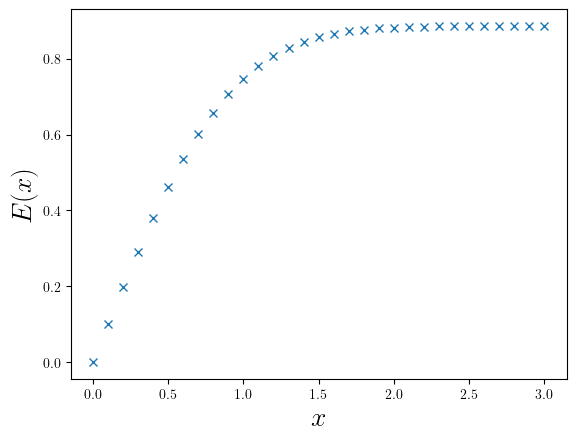

In [97]:
##### Part (3a)

def fun3(x):
    return np.exp(-x**2)

h = 0.1
x_lower = 0
x_upper = 3
n_iter = int(np.ceil((x_upper - x_lower)/h)) # Numnber of division of x values b/w 0 to 3 with step size = 0.1
print(n_iter)
x = np.linspace(x_lower,x_upper,n_iter+1)
print(x,"\n")

#### Here I'm using trapezoidal method to evaluate the integral
N = 100 #### No. of slices for each interval
y_out = []
for i in range(n_iter+1):
    y_out.append(trapezoid(fun3,x_lower,x[i],N))
    print(f"x = {x[i]:0.2f}, E(x) = {y_out[i]:0.6f}")

plt.plot(x,y_out,"x")
plt.xlabel(r"$x$",fontsize=20)
plt.ylabel(r"$E(x)$",fontsize=20)
plt.show()

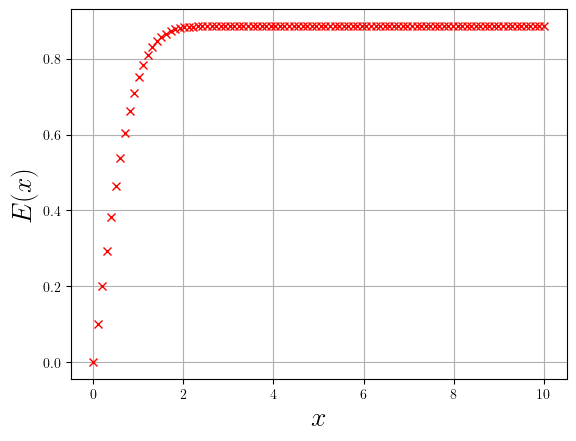

In [96]:
#### Part (3b)
x_arb_upper = 10 #### Arbitrary upper limit for E(x)

x_in = np.linspace(x_lower,x_arb_upper,100)

E_out = []
for x in x_in:
    E_out.append(trapezoid(fun3,x_lower,x,100))
    
plt.plot(x_in,E_out,"x",color='red')
plt.xlabel(r"$x$",fontsize=20)
plt.ylabel(r"$E(x)$",fontsize=20)
plt.grid()
plt.show()